In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
data=pd.read_csv('Data file_Project01.csv')
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
data.shape

(209593, 37)

In [4]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.shape

(209593, 36)

In [7]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
data.describe(include='all')

label       msisdn            aon   daily_decr30  \
count   209593.000000       209593  209593.000000  209593.000000   
unique            NaN       186243            NaN            NaN   
top               NaN  47819I90840            NaN            NaN   
freq              NaN            7            NaN            NaN   
mean         0.875177          NaN    8112.343445    5381.402289   
std          0.330519          NaN   75696.082531    9220.623400   
min          0.000000          NaN     -48.000000     -93.012667   
25%          1.000000          NaN     246.000000      42.440000   
50%          1.000000          NaN     527.000000    1469.175667   
75%          1.000000          NaN     982.000000    7244.000000   
max          1.000000          NaN  999860.755168  265926.000000   

         daily_decr90       rental30       rental90  last_rech_date_ma  \
count   209593.000000  209593.000000  209593.000000      209593.000000   
unique            NaN            NaN            NaN                NaN   
top               NaN            NaN            NaN                NaN   
freq              NaN            NaN            NaN                NaN   
mean      6082.515068    2692.581910    3483.406534        3755.847800   
std      10918.812767    4308.586781    5770.461279       53905.892230   
min        -93.012667  -23737.140000  -24720.580000         -29.000000   
25%         42.692000     280.420000     300.260000           1.000000   
50%       1500.000000    1083.570000    1334.000000           3.000000   
75%       7802.790000    3356.940000    4201.790000           7.000000   
max     320630.000000  198926.110000  200148.110000      998650.377733   

        last_rech_date_da  last_rech_amt_ma  ...  maxamnt_loans30  \
count       209593.000000     209593.000000  ...    209593.000000   
unique                NaN               NaN  ...              NaN   
top                   NaN               NaN  ...              NaN   
freq                  NaN               NaN  ...              NaN   
mean          3712.202921       2064.452797  ...       274.658747   
std          53374.833430       2370.786034  ...      4245.264648   
min            -29.000000          0.000000  ...         0.000000   
25%              0.000000        770.000000  ...         6.000000   
50%              0.000000       1539.000000  ...         6.000000   
75%              0.000000       2309.000000  ...         6.000000   
max         999171.809410      55000.000000  ...     99864.560864   

        medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count        209593.000000  209593.000000  209593.000000    209593.000000   
unique                 NaN            NaN            NaN              NaN   
top                    NaN            NaN            NaN              NaN   
freq                   NaN            NaN            NaN              NaN   
mean              0.054029      18.520919      23.645398         6.703134   
std               0.218039     224.797423      26.469861         2.103864   
min               0.000000       0.000000       0.000000         0.000000   
25%               0.000000       1.000000       6.000000         6.000000   
50%               0.000000       2.000000      12.000000         6.000000   
75%               0.000000       5.000000      30.000000         6.000000   
max               3.000000    4997.517944     438.000000        12.000000   

        medianamnt_loans90      payback30      payback90  pcircle       pdate  
count        209593.000000  209593.000000  209593.000000   209593      209593  
unique                 NaN            NaN            NaN        1          82  
top                    NaN            NaN            NaN      UPW  2016-07-04  
freq                   NaN            NaN            NaN   209593        3150  
mean              0.046077       3.398826       4.321485      NaN         NaN  
std               0.200692       8.813729      10.308108      NaN         Na

In [9]:
data.drop('pcircle',axis=1,inplace=True)

## EDA

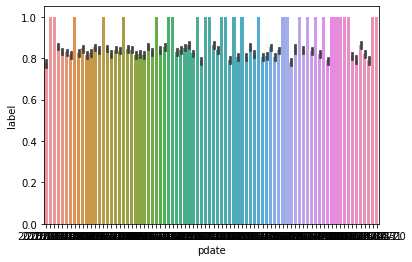

In [10]:
sn.barplot(x='pdate',y='label',data=data)

In [11]:
data[:][data['msisdn']=='04581I85330']

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
6275        1  04581I85330  513.0        99.792        99.792   1489.50   
14274       1  04581I85330  562.0      5206.792      5273.320   1889.76   
33543       1  04581I85330  509.0        88.704        88.704   1324.00   
64319       1  04581I85330  480.0         5.544         5.544     82.75   
132784      1  04581I85330  602.0     22845.000     28260.320   6263.82   
132956      1  04581I85330  606.0      1146.000      1146.000    869.56   
158319      1  04581I85330  601.0     20023.000     25402.320   5341.82   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
6275     1489.50                1.0                0.0              1539  ...   
14274    2882.76                5.0                0.0              1539  ...   
33543    1324.00                1.0                0.0              1539  ...   
64319      82.75                2.0                0.0              1547  ...   
132784   9146.58                1.0                0.0              1539  ...   
132956    869.56                0.0                0.0                 0  ...   
158319   8224.58                2.0                0.0              1924  ...   

        amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
6275              42              6.0                 0.0          7.0   
14274             60              6.0                 0.0         13.0   
33543             30              6.0                 0.0          5.0   
64319             12              6.0                 0.5          2.0   
132784            36              6.0                 0.0         19.0   
132956             6              6.0                 0.0          1.0   
158319            30              6.0                 0.0         18.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
6275              42                6                 0.0   2.285714   
14274             78                6                 0.0   2.444444   
33543             30                6                 0.0   2.333333   
64319             12                6                 0.5   2.000000   
132784           114                6                 0.0   2.555556   
132956             6                6                 0.0   0.000000   
158319           108                6                 0.0   2.857143   

        payback90       pdate  
6275     2.285714  2016-06-18  
14274    2.615385  2016-07-12  
33543    2.333333  2016-06-16  
64319    2.000000  2016-06-01  
132784   2.590909  2016-08-13  
132956   0.000000  2016-08-17  
158319   2.700000  2016-08-12  

[7 rows x 35 columns]

In [12]:
pd.set_option('display.max_column',40)

In [13]:
data

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0         260.13                2.0                0.0              1539   
1        3691.26               20.0                0.0              5787   
2         900.13                3.0                0.0              1539   
3         159.42               41.0                0.0               947   
4        1098.90                4.0                0.0              2309   
...          ...                ...                ...               ...   
209588   1089.19                1.0                0.0              4048   
209589   1728.36                4.0                0.0               773   
209590   8893.20                3.0                0.0              1539   
209591    984.58                2.0               38.0               773   
209592    631.20               13.0                0.0              7526   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                   2          21.0             3078.0                1539.0   
1                   1           0.0             5787.0                5787.0   
2                   1           0.0             1539.0                1539.0   
3                   0           0.0                0.0                   0.0   
4                   7           2.0            20029.0                2309.0   
...               ...           ...                ...                   ...   
209588              3           2.0            10404.0                3178.0   
209589              4           1.0             3092.0                 773.0   
209590              5           8.0             9334.0                1539.0   
209591              5           4.0            12154.0                 773.0   
209592              2           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32   

In [14]:
Y=data.iloc[:,0]

In [15]:
for i in data.columns:
    if i=='pdate':
        continue
    else:
        data[i]=pd.to_numeric(data[i],errors='coerce')

In [16]:
data.describe(include='all')

label  msisdn            aon   daily_decr30   daily_decr90  \
count   209593.000000     0.0  209593.000000  209593.000000  209593.000000   
unique            NaN     NaN            NaN            NaN            NaN   
top               NaN     NaN            NaN            NaN            NaN   
freq              NaN     NaN            NaN            NaN            NaN   
mean         0.875177     NaN    8112.343445    5381.402289    6082.515068   
std          0.330519     NaN   75696.082531    9220.623400   10918.812767   
min          0.000000     NaN     -48.000000     -93.012667     -93.012667   
25%          1.000000     NaN     246.000000      42.440000      42.692000   
50%          1.000000     NaN     527.000000    1469.175667    1500.000000   
75%          1.000000     NaN     982.000000    7244.000000    7802.790000   
max          1.000000     NaN  999860.755168  265926.000000  320630.000000   

             rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count   209593.000000  209593.000000      209593.000000      209593.000000   
unique            NaN            NaN                NaN                NaN   
top               NaN            NaN                NaN                NaN   
freq              NaN            NaN                NaN                NaN   
mean      2692.581910    3483.406534        3755.847800        3712.202921   
std       4308.586781    5770.461279       53905.892230       53374.833430   
min     -23737.140000  -24720.580000         -29.000000         -29.000000   
25%        280.420000     300.260000           1.000000           0.000000   
50%       1083.570000    1334.000000           3.000000           0.000000   
75%       3356.940000    4201.790000           7.000000           0.000000   
max     198926.110000  200148.110000      998650.377733      999171.809410   

        last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count      209593.000000  209593.000000  209593.000000      209593.000000   
unique               NaN            NaN            NaN                NaN   
top                  NaN            NaN            NaN                NaN   
freq                 NaN            NaN            NaN                NaN   
mean         2064.452797       3.978057    3737.355121        7704.501157   
std          2370.786034       4.256090   53643.625172       10139.621714   
min             0.000000       0.000000       0.000000           0.000000   
25%           770.000000       1.000000       0.000000        1540.000000   
50%          1539.000000       3.000000       2.000000        4628.000000   
75%          2309.000000       5.000000       6.000000       10010.000000   
max         55000.000000     203.000000  999606.368132      810096.000000   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count          209593.000000         209593.000000   209593.00000   
unique                   NaN                   NaN            NaN   
top                      NaN                   NaN            NaN   
freq                     NaN                   NaN            NaN   
mean             1812.817952           3851.927942        6.31543   
std              2070.864620          54006.374433        7.19347   
min                 0.000000           -200.000000        0.00000   
25%               770.000000             11.000000        2.00000   
50%              1539.000000             33.900000        4.00000   
75%              1924.000000             83.000000        8.00000   
max             55000.000000         999479.419319      336.00000   

         fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.000000      209593.000000         209593.000000   
unique            NaN                NaN                   NaN   
top               NaN                NaN                   NaN   
freq              NaN                NaN                   NaN   
mean         7.716780       12396.218352           1864.59

In [17]:
labels=dict(enumerate(data.columns))

In [18]:
labels

{0: 'label',
 1: 'msisdn',
 2: 'aon',
 3: 'daily_decr30',
 4: 'daily_decr90',
 5: 'rental30',
 6: 'rental90',
 7: 'last_rech_date_ma',
 8: 'last_rech_date_da',
 9: 'last_rech_amt_ma',
 10: 'cnt_ma_rech30',
 11: 'fr_ma_rech30',
 12: 'sumamnt_ma_rech30',
 13: 'medianamnt_ma_rech30',
 14: 'medianmarechprebal30',
 15: 'cnt_ma_rech90',
 16: 'fr_ma_rech90',
 17: 'sumamnt_ma_rech90',
 18: 'medianamnt_ma_rech90',
 19: 'medianmarechprebal90',
 20: 'cnt_da_rech30',
 21: 'fr_da_rech30',
 22: 'cnt_da_rech90',
 23: 'fr_da_rech90',
 24: 'cnt_loans30',
 25: 'amnt_loans30',
 26: 'maxamnt_loans30',
 27: 'medianamnt_loans30',
 28: 'cnt_loans90',
 29: 'amnt_loans90',
 30: 'maxamnt_loans90',
 31: 'medianamnt_loans90',
 32: 'payback30',
 33: 'payback90',
 34: 'pdate'}

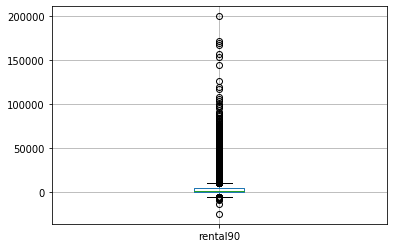

In [19]:
data.boxplot('rental90')

In [20]:
data['aon'].mean()

8112.343444891092

In [21]:
data.describe()

label  msisdn            aon   daily_decr30   daily_decr90  \
count  209593.000000     0.0  209593.000000  209593.000000  209593.000000   
mean        0.875177     NaN    8112.343445    5381.402289    6082.515068   
std         0.330519     NaN   75696.082531    9220.623400   10918.812767   
min         0.000000     NaN     -48.000000     -93.012667     -93.012667   
25%         1.000000     NaN     246.000000      42.440000      42.692000   
50%         1.000000     NaN     527.000000    1469.175667    1500.000000   
75%         1.000000     NaN     982.000000    7244.000000    7802.790000   
max         1.000000     NaN  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamn

In [22]:
data.drop(['msisdn','pdate'],axis=1,inplace=True)

In [23]:
for i in data.columns:
   data[i]=data[i].fillna(np.inf)

In [24]:
mode=data['aon'].mode()

In [25]:
mode=mode.astype(float)

In [26]:
mode

0    95.0
dtype: float64

In [27]:
data['aon']=data['aon'].fillna(95)

In [28]:
data['aon'].mode()

0    95.0
dtype: float64

In [29]:
mode=dict(enumerate(data[i].mode() for i in data.columns))

In [30]:
labels=dict(enumerate(data.columns))

In [31]:
List=[]
for i,j in mode.items():
    List.append(float(j))

In [32]:
List

[1.0,
 95.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1539.0,
 1.0,
 0.0,
 0.0,
 1539.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1539.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 6.0,
 6.0,
 0.0,
 1.0,
 6.0,
 6.0,
 0.0,
 0.0,
 0.0]

In [33]:
data[data.notnull()].count()

label                   209593
aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback9

In [34]:
data['label'][data['label']==1].count()

183431

In [35]:
data['label'][data['label']==0].count()

26162

In [36]:
headnames=[str(i) for i in data.columns]

In [37]:
headnames

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

## Data Preprocessing

In [38]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()

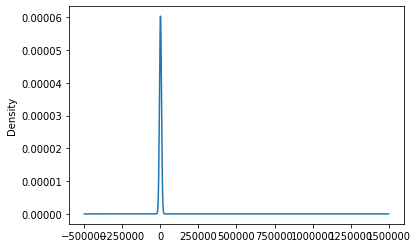

In [39]:
data.aon.plot(kind='density')

In [40]:
Y=data.label

In [41]:
data.drop('label',axis=1,inplace=True)

In [42]:
data=scaler.fit_transform(data)

In [43]:
data=pd.DataFrame(data,columns=headnames[1:])

In [44]:
data

aon  daily_decr30  daily_decr90  rental30  rental90  \
0       0.040558      0.455545      0.457051  0.032824  0.038789   
1       0.032192      0.548083      0.548207  0.166896  0.166896   
2       0.127283      0.332602      0.332602  0.214152  0.214152   
3       0.143966      0.012681      0.012681  0.095233  0.095233   
4       0.030319      0.004822      0.004822  0.035182  0.035182   
...          ...           ...           ...       ...       ...   
209588  0.025266      0.009498      0.009498  0.068118  0.068118   
209589  0.182149      0.006258      0.006258  0.292856  0.292856   
209590  0.035028      0.409517      0.411634  0.202693  0.307513   
209591  0.061433      0.442953      0.446008  0.014607  0.034923   
209592  0.068327      0.194021      0.195985  0.020914  0.027279   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                0.000298           0.000000          0.229483       0.000298   
1                0.000904           0.000000          0.261653       0.000045   
2                0.000714           0.000000          0.366148       0.000238   
3                0.024492           0.000000          0.565709       0.000000   
4                0.000128           0.000000          0.073925       0.000224   
...                   ...                ...               ...            ...   
209588           0.000063           0.000000          0.253163       0.000188   
209589           0.000678           0.000000          0.130978       0.000678   
209590           0.000104           0.000000          0.053216       0.000173   
209591           0.000071           0.001348          0.027418       0.000177   
209592           0.000562           0.000000          0.325258       0.000086   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           0.003131           0.458967              0.229483   
1           0.000000           0.261653              0.261653   
2           0.000000           0.366148              0.366148   
3           0.000000           0.000000              0.000000   
4           0.000064           0.641247              0.073925   
...              ...                ...                   ...   
209588      0.000125           0.650668              0.198753   
209589      0.000169           0.523913              0.130978   
209590      0.000277           0.322755              0.053216   
209591      0.000142           0.431098              0.027418   
209592      0.000043           0.391770              0.195885   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                   0.001118       0.000298      0.003131           0.458967   
1                   0.002760       0.000045      0.000000           0.261653   
2                   0.015778       0.000238      0.000000           0.366148   
3                   0.000000       0.000597      0.000000           0.565709   
4                   0.000928       0.000256      0.000064           0.752247   
...                      ...            ...           ...                ...   
209588              0.005742       0.000188      0.000125           0.650668   
209589              0.027331       0.001017      0.000339           0.684204   
209590              0.001768       0.000380      0.000173           0.642883   
209591              0.005817       0.000213      0.000142           0.636360   
209592              0.015416       0.000130      0.000821           0.717027   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                   0.229483              0.001118            0.0   
1                   0.261653              0.002760            0.0   
2                   0.366148              0.015778            0.0   
3                   0.565709              0.001493            0.0   
4                   0.092462              0.001121            0.0   
...                      ...                   ...            ...  

In [45]:
from sklearn.ensemble import ExtraTreesClassifier as etc
array=data.values
x=array
y=Y.values
model=etc()
model.fit(x,y)
score=model.feature_importances_
score

array([0.04758756, 0.07889439, 0.07651435, 0.06278259, 0.056021  ,
       0.03896002, 0.00329386, 0.03257829, 0.02403699, 0.01423179,
       0.04472447, 0.03383509, 0.02396356, 0.02620938, 0.01801676,
       0.06749784, 0.03493698, 0.02621887, 0.00232879, 0.00117381,
       0.00292956, 0.00087054, 0.0411126 , 0.04046502, 0.03833408,
       0.00713754, 0.03380718, 0.0399852 , 0.04838529, 0.00715413,
       0.01191782, 0.01409465])

In [46]:
answer=list(zip(data.columns,score))

In [47]:
answer

[('aon', 0.04758756443307564),
 ('daily_decr30', 0.07889438692939127),
 ('daily_decr90', 0.07651434935941065),
 ('rental30', 0.06278258990595495),
 ('rental90', 0.05602099919164309),
 ('last_rech_date_ma', 0.03896001594375552),
 ('last_rech_date_da', 0.0032938551912888667),
 ('last_rech_amt_ma', 0.032578288793551353),
 ('cnt_ma_rech30', 0.024036989103446267),
 ('fr_ma_rech30', 0.01423179393563161),
 ('sumamnt_ma_rech30', 0.0447244676887181),
 ('medianamnt_ma_rech30', 0.03383509145387433),
 ('medianmarechprebal30', 0.02396356262232887),
 ('cnt_ma_rech90', 0.026209383573636585),
 ('fr_ma_rech90', 0.018016764511995124),
 ('sumamnt_ma_rech90', 0.06749783905836451),
 ('medianamnt_ma_rech90', 0.034936978644007646),
 ('medianmarechprebal90', 0.026218867893984452),
 ('cnt_da_rech30', 0.0023287914527427007),
 ('fr_da_rech30', 0.0011738101441524202),
 ('cnt_da_rech90', 0.0029295610079875397),
 ('fr_da_rech90', 0.0008705370485795567),
 ('cnt_loans30', 0.041112600733386184),
 ('amnt_loans30', 0.04

In [48]:
from operator import itemgetter
sorted(answer,key=itemgetter(1),reverse=True)

[('daily_decr30', 0.07889438692939127),
 ('daily_decr90', 0.07651434935941065),
 ('sumamnt_ma_rech90', 0.06749783905836451),
 ('rental30', 0.06278258990595495),
 ('rental90', 0.05602099919164309),
 ('maxamnt_loans90', 0.04838529422757598),
 ('aon', 0.04758756443307564),
 ('sumamnt_ma_rech30', 0.0447244676887181),
 ('cnt_loans30', 0.041112600733386184),
 ('amnt_loans30', 0.0404650230376471),
 ('amnt_loans90', 0.039985195710684325),
 ('last_rech_date_ma', 0.03896001594375552),
 ('maxamnt_loans30', 0.038334078547193416),
 ('medianamnt_ma_rech90', 0.034936978644007646),
 ('medianamnt_ma_rech30', 0.03383509145387433),
 ('cnt_loans90', 0.033807182509678284),
 ('last_rech_amt_ma', 0.032578288793551353),
 ('medianmarechprebal90', 0.026218867893984452),
 ('cnt_ma_rech90', 0.026209383573636585),
 ('cnt_ma_rech30', 0.024036989103446267),
 ('medianmarechprebal30', 0.02396356262232887),
 ('fr_ma_rech90', 0.018016764511995124),
 ('fr_ma_rech30', 0.01423179393563161),
 ('payback90', 0.014094646956367

In [49]:
from sklearn.ensemble import RandomForestClassifier as rf, GradientBoostingClassifier as gb

In [76]:
RF=rf()
GB=gb()
from sklearn.feature_selection import RFE

In [ ]:
rfe=RFE(RF,25)
fit=rfe.fit(x,y)
results=fit.transform(x)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

In [ ]:
type(fit.support_)

In [ ]:
j=1
names=[]
for i in fit.support_:
    if i==True:
        names.append(headnames[j])
    j+=1

In [ ]:
names

In [ ]:
datafs=pd.DataFrame()
for i in names:
    datafs[i]=data[i]

In [ ]:
from scipy import stats
datafs[(np.abs(stats.zscore(datafs))<3).all(axis=1)]

In [ ]:
data.boxplot('last_rech_date_ma')

In [ ]:
Y

## Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(datafs,Y,random_state=7)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
pre=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(pre,y_test))

In [ ]:
from sklearn.utils import resample
datafs['lable']=Y
df_majority=datafs[datafs.lable==1]
df_minority=datafs[datafs.lable==0]

df_downsamp=resample(df_majority,replace=False,n_samples=23737,random_state=7)

In [ ]:
df_downsamp

In [ ]:
df_down=pd.concat([df_downsamp,df_minority])

In [ ]:
y=df_down.lable
df_down.drop(['lable'],axis=1,inplace=True)
df_down

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_down,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

In [ ]:
y=datafs['lable']
datafs.drop(['lable'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))

In [ ]:
datafs['label']=y[:]

In [ ]:
df_majority=datafs[datafs.label==1]
df_minority=datafs[datafs.label==0]

df_upsamp=resample(df_minority,replace=True,n_samples=166264,random_state=7)

df_up=pd.concat([df_majority,df_upsamp])
y=df_up.label
df_up.drop('label',axis=1,inplace=True)
x_train,x_test,y_train,y_test=train_test_split(df_up,y,random_state=7)
model=RandomForestClassifier()
model.fit(x_train,y_train)
pre=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

In [ ]:
y=datafs['label']
datafs.drop(['label'],axis=1,inplace=True)
pre=model.predict(datafs)
from sklearn.metrics import classification_report
print(classification_report(pre,y))
from sklearn.metrics import confusion_matrix
result=confusion_matrix(pre,y)

In [ ]:
from sklearn.metrics import accuracy_score
x_train,x_val,y_train,y_val=train_test_split(df_up,y,random_state=7)

In [ ]:
#MODEL-1) LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-1: Accuracy of LogisticRegression : ", acc_logreg )

In [ ]:
#MODEL-2) Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-2: Accuracy of GaussianNB : ", acc_gaussian  )

In [ ]:
#MODEL-3) Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-3: Accuracy of Support Vector Machines : ", acc_svc  )

In [ ]:
#MODEL-4) Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-4: Accuracy of LinearSVC : ",acc_linear_svc  )

In [ ]:
#MODEL-5) Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-5: Accuracy of Perceptron : ",acc_perceptron  )

In [ ]:
#MODEL-6) Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-6: Accuracy of DecisionTreeClassifier : ", acc_decisiontree  )

In [ ]:
#MODEL-7) Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-7: Accuracy of RandomForestClassifier : ",acc_randomforest  )

In [ ]:
#MODEL-8) KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-8: Accuracy of k-Nearest Neighbors : ",acc_knn  )

In [ ]:
#MODEL-9) Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-9: Accuracy of Stochastic Gradient Descent : ",acc_sgd )

In [ ]:
#MODEL-10) Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-10: Accuracy of GradientBoostingClassifier : ",acc_gbk )

In [ ]:
#Let's compare the accuracies of each model!

models = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian Naive Bayes','Support Vector Machines',
              'Linear SVC', 'Perceptron',  'Decision Tree',
              'Random Forest', 'KNN','Stochastic Gradient Descent',
              'Gradient Boosting Classifier'],
    'Score': [acc_logreg, acc_gaussian, acc_svc,
              acc_linear_svc, acc_perceptron,  acc_decisiontree,
              acc_randomforest,  acc_knn,  acc_sgd, acc_gbk]
                    })


print()
print( models.sort_values(by='Score', ascending=False) )